In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_name = "/content/drive/My Drive/Colab Notebooks/Mushrooms/mushrooms.csv"

In [ ]:
df = pd.read_csv(file_name)

In [ ]:
# Dataset head
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data Preprocessing

Check for null values

In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

As seen above, there are no null values in our dataset, however, we need to check if it has any null values of the type "NA", "N/A", "None", etc.

In [ ]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All columns are of the type object (i.e String), so there could be missing or bad data

In [ ]:
def print_unique_values_by_column(df):
  for column in df.columns:
    print("Unique values in column [{0}] are: ".format(column), df[column].unique())

In [ ]:
print_unique_values_by_column(df)

Unique values in column [class] are:  ['p' 'e']
Unique values in column [cap-shape] are:  ['x' 'b' 's' 'f' 'k' 'c']
Unique values in column [cap-surface] are:  ['s' 'y' 'f' 'g']
Unique values in column [cap-color] are:  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values in column [bruises] are:  ['t' 'f']
Unique values in column [odor] are:  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values in column [gill-attachment] are:  ['f' 'a']
Unique values in column [gill-spacing] are:  ['c' 'w']
Unique values in column [gill-size] are:  ['n' 'b']
Unique values in column [gill-color] are:  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values in column [stalk-shape] are:  ['e' 't']
Unique values in column [stalk-root] are:  ['e' 'c' 'b' 'r' '?']
Unique values in column [stalk-surface-above-ring] are:  ['s' 'f' 'k' 'y']
Unique values in column [stalk-surface-below-ring] are:  ['s' 'f' 'y' 'k']
Unique values in column [stalk-color-above-ring] are:  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c

The column "stalk-root" may contain and unknown value "?" i.e a missing value

In [ ]:
# Print rows that contain the stalk-root=? value
df[df.isin(['?']).any(axis=1)].count()

class                       2480
cap-shape                   2480
cap-surface                 2480
cap-color                   2480
bruises                     2480
odor                        2480
gill-attachment             2480
gill-spacing                2480
gill-size                   2480
gill-color                  2480
stalk-shape                 2480
stalk-root                  2480
stalk-surface-above-ring    2480
stalk-surface-below-ring    2480
stalk-color-above-ring      2480
stalk-color-below-ring      2480
veil-type                   2480
veil-color                  2480
ring-number                 2480
ring-type                   2480
spore-print-color           2480
population                  2480
habitat                     2480
dtype: int64

Since there are 2480 rows that contains this missing value for stalk-root, we cannot simply drop this row. Instead, we will handle the missing value using Machine Learning.

In total we have 8124 rows out of which 2480 rows has this missing stalk-root value, which means 70% dataset has a value for stalk-root.

We will apply Machine Learning to predict the missing stalk-root value.

### Predict the missing value in 'stalk-root' column

In [ ]:
# Predict and fill the missing stalk-root value

# Replace '?' value with 'NA'.
df['stalk-root'].replace('?', pd.NA, inplace=True)

known = df[df['stalk-root'].notna()]
unknown = df[df['stalk-root'].isna()]

# Removing stalk-root from the dataset because that's what we want to predict
known_without_stalk_root = known.drop('stalk-root', axis=1)
unknown_without_stalk_root = unknown.drop('stalk-root', axis=1)

# Make one hot encoding of the categorical values
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# X becomes the data without 'stalk-root'
X_known = one_hot_encoder.fit_transform(known_without_stalk_root)
X_unknown = one_hot_encoder.transform(unknown_without_stalk_root)
# Y becomes 'stalk-root' because that's what we want to predict
y_known = known['stalk-root']

# Train the classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_known, y_known)

# Predict the value
y_pred = random_forest_classifier.predict(X_unknown)

# Set the value back to our column
df.loc[df['stalk-root'].isna(), 'stalk-root'] = y_pred

Unique values in the column after handling missing values

In [ ]:
print_unique_values_by_column(df)

Unique values in column [class] are:  ['p' 'e']
Unique values in column [cap-shape] are:  ['x' 'b' 's' 'f' 'k' 'c']
Unique values in column [cap-surface] are:  ['s' 'y' 'f' 'g']
Unique values in column [cap-color] are:  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values in column [bruises] are:  ['t' 'f']
Unique values in column [odor] are:  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values in column [gill-attachment] are:  ['f' 'a']
Unique values in column [gill-spacing] are:  ['c' 'w']
Unique values in column [gill-size] are:  ['n' 'b']
Unique values in column [gill-color] are:  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values in column [stalk-shape] are:  ['e' 't']
Unique values in column [stalk-root] are:  ['e' 'c' 'b' 'r']
Unique values in column [stalk-surface-above-ring] are:  ['s' 'f' 'k' 'y']
Unique values in column [stalk-surface-below-ring] are:  ['s' 'f' 'y' 'k']
Unique values in column [stalk-color-above-ring] are:  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y

In [ ]:
# Distribution of Poisinous and Edible
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of classes in Mushrooms Dataset')

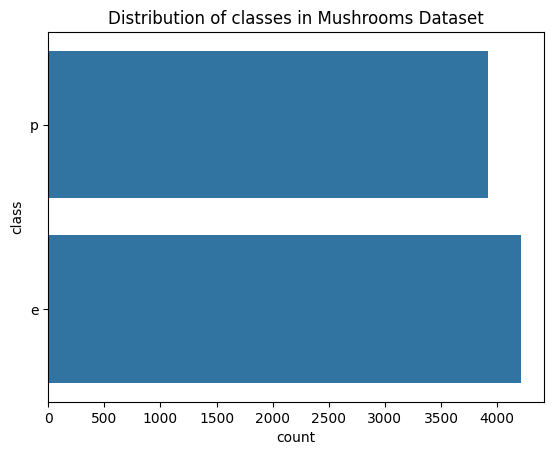

In [ ]:
sns.countplot(df['class'])
plt.title("Distribution of classes in Mushrooms Dataset")

As seen above all values are textual, we will need to convert it into numeric for classification

In [ ]:
label_encoder = LabelEncoder()
for column in df.columns:
  # Convert only if it is not already numeric
  if not pd.api.types.is_numeric_dtype(df[column]):
    encoded_column = label_encoder.fit_transform(df[column])
    df[column] = encoded_column

Unique values after converting to numeric form

In [ ]:
print_unique_values_by_column(df)

Unique values in column [class] are:  [1 0]
Unique values in column [cap-shape] are:  [5 0 4 2 3 1]
Unique values in column [cap-surface] are:  [2 3 0 1]
Unique values in column [cap-color] are:  [4 9 8 3 2 5 0 7 1 6]
Unique values in column [bruises] are:  [1 0]
Unique values in column [odor] are:  [6 0 3 5 2 1 8 7 4]
Unique values in column [gill-attachment] are:  [1 0]
Unique values in column [gill-spacing] are:  [0 1]
Unique values in column [gill-size] are:  [1 0]
Unique values in column [gill-color] are:  [ 4  5  2  7 10  3  9  1  0  8 11  6]
Unique values in column [stalk-shape] are:  [0 1]
Unique values in column [stalk-root] are:  [2 1 0 3]
Unique values in column [stalk-surface-above-ring] are:  [2 0 1 3]
Unique values in column [stalk-surface-below-ring] are:  [2 0 3 1]
Unique values in column [stalk-color-above-ring] are:  [7 3 6 4 0 2 5 1 8]
Unique values in column [stalk-color-below-ring] are:  [7 6 3 0 4 2 8 5 1]
Unique values in column [veil-type] are:  [0]
Unique value

As seen the values range between 0-11 so we need to standardize these values using a StandardScaler

In [ ]:
standard_scaler = StandardScaler()
# Get the class values
y = df['class']
# Remove class values to transform the df
X = df.drop(['class'], axis=1)

# Use StandardScaler to transform values
X_scaled = standard_scaler.fit_transform(X)

# Reconstruct the df
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df['class'] = y
scaled_df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028,1
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730,0
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149,0
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028,1
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710,0
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710,0
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710,0
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710,1


In [ ]:
# Write to CSV
scaled_df.to_csv("/content/drive/My Drive/Colab Notebooks/Mushrooms/preprocessed_mushrooms.csv", index=False)